# Clustering Analysis

The purpose of this analysis is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


The dataset is part of "Drug consumption". You can find more information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

You need to submit this ipython file after renaming it. 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the Dataset
df = pd.read_csv('drug_consumption.csv', encoding="latin-1")
#make a copy of the dataframe
df_drug = df.copy()        
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [4]:
#print first 5 rows of the dataset
df_drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, we will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [5]:
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df_drug[column] = le.fit_transform(df_drug[column])
    
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(columns)):
    df_drug.loc[((df_drug[columns[i]]==0) | (df_drug[columns[i]]==1)),cp[i]] = 'Non-user'
    df_drug.loc[((df_drug[columns[i]]==2) | (df_drug[columns[i]]==3) | (df_drug[columns[i]]==4) | (df_drug[columns[i]]==5) | (df_drug[columns[i]]==6)),cp[i]] = 'User'
  

In [6]:
df_drug = df_drug.drop(columns=['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA'])
df_drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,User_VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user


In [7]:
target_column = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

for col in target_column:
   df_drug[col] = df_drug[col].apply(lambda x: 1 if x=='User' else 0)

In [8]:
df_drug.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,User_VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,1,1,0,0


In [9]:
mms = MinMaxScaler()
mms.fit(df_drug)
data_transformed = mms.transform(df_drug)

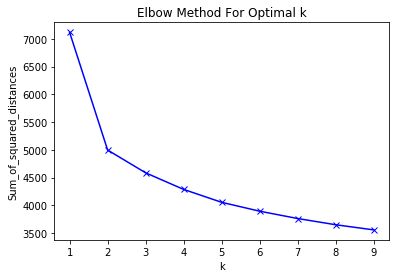

From the graph k=3, It is the optimal number of clusters with minimal sum of squared error.


In [10]:
#########################begin code for Task 1-a
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("From the graph k=3, It is the optimal number of clusters with minimal sum of squared error.")
#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, we will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [11]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
#split dataset into train and test data
X = df_drug[['ID','Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].values
y = df_drug['User_Cannabis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Important!!!
### Created training and testing datasets will be used for the rest of this assignment except Task 3.
###################end code for Task 1-b-1

cluster centers: [[ 4.67442635e+02 -2.91748662e-02]
 [-4.76748538e+02  2.97556828e-02]]


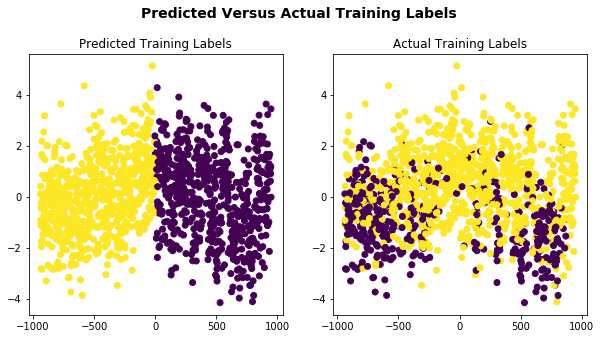

In [12]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Create the KMeans model
kmeans = KMeans(n_clusters=2)

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample 
kmeansFit=kmeans.fit(X_train_pca)
train_labels = kmeansFit.predict(X_train_pca)
centers = kmeans.cluster_centers_
print("cluster centers:",centers)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Adjust layout
fig.suptitle('Predicted Versus Actual Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()
##################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

cluster centers: [[-4.87279569e+02  6.85794711e-02]
 [ 4.57241788e+02 -6.43519694e-02]]


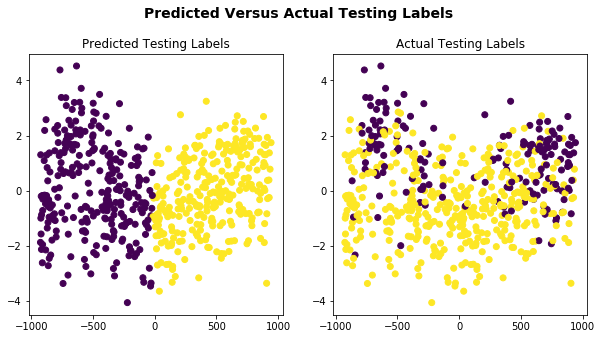

In [13]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

# Create the KMeans model
kmeans = KMeans(n_clusters=2)

# Model and fit the data to the PCA model
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Compute cluster centers and predict cluster index for each sample 
kmeansFit=kmeans.fit(X_test_pca)
train_labels = kmeansFit.predict(X_test_pca)
centers = kmeans.cluster_centers_
print("cluster centers:",centers)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Adjust layout
fig.suptitle('Predicted Versus Actual Testing Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=train_labels)
ax[0].set_title('Predicted Testing Labels')
ax[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
ax[1].set_title('Actual Testing Labels')

# Show the plots
plt.show()
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [14]:
###################begin code for Task 1-b-4: Print out a confusion matrix
y_pred=kmeans.fit_predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))
cm = confusion_matrix(y_test, y_pred)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))
###################end code for Task 1-b-4

Accuracy: 0.4788
 	FALSE	TRUE
FALSE	76	97
TRUE	198	195


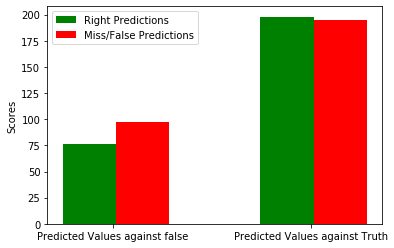

In [15]:
bar_1 = [cm[0][0],cm[1][0]]
bar_2 = [cm[0][1],cm[1][1]]
N = 3
ind = np.arange(2)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = bar_1
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = bar_2
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Scores')
ax.set_xticks(ind + 0.12)
ax.set_xticklabels( ("Predicted Values against false","Predicted Values against Truth") )
ax.legend( (rects1[0], rects2[0]), ('Right Predictions', 'Miss/False Predictions') )


plt.show()

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, we will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [16]:
###################begin code for Task 2-a: Find the best Hierarchical Agglomerative Clustering Model
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

map={}
## Calculate pairwise distance matrix for X_train
pdm_euclidean = pairwise_distances(X_train, metric='euclidean')
pdm_cosine = pairwise_distances(X_train, metric='cosine')
pdm_manhattan = pairwise_distances(X_train, metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model for Complete Linkage
## For cosine
complete_cosine_clustering_fit = AgglomerativeClustering(n_clusters = 2,affinity='cosine',linkage='complete').fit_predict(pdm_cosine)
Compcos=f1_score(y_train,complete_cosine_clustering_fit)
map.update( {Compcos:'complete_cosine_clustering_fit'} )

## For euclidean
complete_euclidean_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='complete').fit_predict(pdm_euclidean)
Compeuc=f1_score(y_train,complete_euclidean_clustering_fit)
map.update( {Compeuc:'complete_euclidean_clustering_fit'} )

## For manhattan
complete_manhattan_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='complete').fit_predict(pdm_manhattan)
Compman=f1_score(y_train,complete_manhattan_clustering_fit)
map.update( {Compman:'complete_manhattan_clustering_fit'} )

In [17]:
## Model and fit the training data to the AgglomerativeClustering model for average linkage
## For cosine
average_cosine_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='cosine',linkage='average').fit_predict(pdm_cosine)
Avgcos=f1_score(y_train,average_cosine_clustering_fit)
map.update( {Avgcos:'average_cosine_clustering_fit'} )

## For euclidean
average_euclidean_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='average').fit_predict(pdm_euclidean)
Avgeuc=f1_score(y_train,average_euclidean_clustering_fit)
map.update( {Avgeuc:'average_euclidean_clustering_fit'} )

## For manhattan
average_manhattan_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='average').fit_predict(pdm_manhattan)
Avgman=f1_score(y_train,average_manhattan_clustering_fit)
map.update( {Avgman:'average_manhattan_clustering_fit'} )


In [18]:
#Printing the F1 score values for the above
print("F1-score for complete linkage + cosine",Compcos)
print("F1-score for complete linkage + euclidean", Compeuc)
print("F1-score for complete linkage + manhattan", Compman)
print("F1-score for average linkage + cosine", Avgcos)
print("F1-score for average linkage + euclidean", Avgeuc)
print("F1-score for average linkage + manhattan", Avgman)
maxValue=max(Compcos,Compeuc,Compman,Avgcos,Avgeuc,Avgman)
print("The best pair of linkage method and similarity measure :", maxValue, " is ", map.get(maxValue))
###################end code for Task 2-a

F1-score for complete linkage + cosine 0.011312217194570137
F1-score for complete linkage + euclidean 0.30401234567901236
F1-score for complete linkage + manhattan 0.5954907161803713
F1-score for average linkage + cosine 0.7944700460829492
F1-score for average linkage + euclidean 0.4358084663428175
F1-score for average linkage + manhattan 0.2857142857142857
The best pair of linkage method and similarity measure : 0.7944700460829492  is  average_cosine_clustering_fit


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Finding the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

The best Agglomerative Clustering Approach is: average cosine


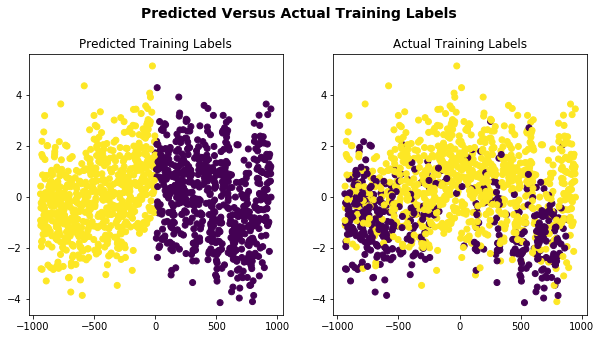

In [19]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
string=map.get(maxValue).split("_")
print("The best Agglomerative Clustering Approach is:",string[0],string[1])
# Visualize the predicted training labels versus actual training labels. 
bestAgglomerativeClustering = AgglomerativeClustering(n_clusters=2, affinity=string[1], linkage=string[0])  
X_train_best_pca = bestAgglomerativeClustering.fit_predict(X_train_pca)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Adjust layout
fig.suptitle('Predicted Versus Actual Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=X_train_best_pca)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()
###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[]

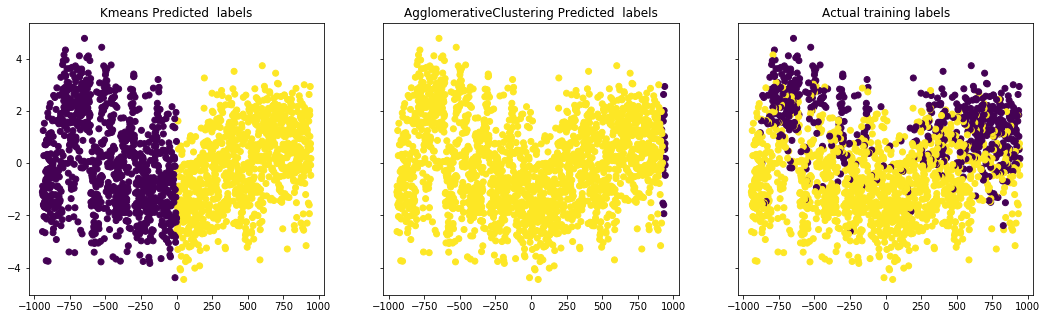

In [20]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
# Create the KMeans model
kmeans = KMeans(n_clusters=2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_drug)
kmeansFit=kmeans.fit_predict(X_pca)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
### Agglomerative Clustering
best_pdm = pairwise_distances(df_drug, metric=string[1])
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglomerativeClustering = AgglomerativeClustering(n_clusters=2, affinity=string[1], linkage=string[0])  
agglomerativeClustering_fitPredict = agglomerativeClustering.fit_predict(best_pdm)

### Visualize Clusters
#  Model and fit the data to the PCA model
# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeansFit)
ax1.set_title('Kmeans Predicted  labels')
ax1.plot()

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerativeClustering_fitPredict)
ax2.set_title('AgglomerativeClustering Predicted  labels')
ax2.plot()

ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=df_drug['User_Cannabis'])
ax3.set_title('Actual training labels')
ax3.plot()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [21]:
###################begin code for Task 3-b
kmean = KMeans(2)
kMeanFit = kmean.fit_predict(df_drug)
X_best_pca_Whole = bestAgglomerativeClustering.fit_predict(df_drug)


print("Confusion_matrix for AgglomerativeClustering")
accuracy = metrics.accuracy_score(df_drug['User_Cannabis'], X_best_pca_Whole)
print('Accuracy: {:.4f}'.format(accuracy))
cm = confusion_matrix(df_drug['User_Cannabis'], X_best_pca_Whole)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

print("\nConfusion_matrix for kmeans")
accuracy = metrics.accuracy_score(df_drug['User_Cannabis'], kMeanFit)
print('Accuracy: {:.4f}'.format(accuracy))
cm = confusion_matrix(df_drug['User_Cannabis'], kMeanFit)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

Confusion_matrix for AgglomerativeClustering
Accuracy: 0.3284
 	FALSE	TRUE
FALSE	619	1
TRUE	1265	0

Confusion_matrix for kmeans
Accuracy: 0.4515
 	FALSE	TRUE
FALSE	265	355
TRUE	679	586


In [22]:
## Classification Report 
print("classification_report for AgglomerativeClustering")
print(classification_report(df_drug['User_Cannabis'], X_best_pca_Whole))
print("classification_report for kmeans")
print(classification_report(df_drug['User_Cannabis'], kMeanFit))
print("\nReasoning: As we can see that here we are choosing User_cannabis to be our target class the precision and accuracy depends  on this selected target value.\nFrom this we can see that the accuracy using kmeans is more than using Aglomerative clustering.\nF1 Score is the weighted average of Precision and Recall. As the precision of kmeans is better, Kmeans clustering model is more useful when compared to Aglomerative.")
###################end code for Task 3-b

classification_report for AgglomerativeClustering
              precision    recall  f1-score   support

           0       0.33      1.00      0.49       620
           1       0.00      0.00      0.00      1265

    accuracy                           0.33      1885
   macro avg       0.16      0.50      0.25      1885
weighted avg       0.11      0.33      0.16      1885

classification_report for kmeans
              precision    recall  f1-score   support

           0       0.28      0.43      0.34       620
           1       0.62      0.46      0.53      1265

    accuracy                           0.45      1885
   macro avg       0.45      0.45      0.44      1885
weighted avg       0.51      0.45      0.47      1885


Reasoning: As we can see that here we are choosing User_cannabis to be our target class the precision and accuracy depends  on this selected target value.
From this we can see that the accuracy using kmeans is more than using Aglomerative clustering.
F1 Score is

## REFERENCES

[1] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
[2] https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html
[3] https://www.datacamp.com/community/tutorials/machine-learning-python
[4] https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
[5] https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
[6] https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
[7] https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
[8] https://stackabuse.com/k-means-clustering-with-scikit-learn/
[9] https://amysfernweh.wordpress.com/2017/09/08/pythonprincipal-component-analysis-and-k-means-clustering-with-imdb-movie-datasets/
[10] https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
[11] https://pbpython.com/categorical-encoding.html
[12] https://www.datacamp.com/community/tutorials/k-means-clustering-python